# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [3]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  21.4M      0  0:00:04  0:00:04 --:--:-- 21.4M
total 1756
-rw-r--r-- 1 sidjee sidjee 1728649 Jun 30 16:51 image_denoising.ipynb
drwx------ 2 sidjee sidjee   57344 Jun  9 15:06 paintings
-rw-r--r-- 1 sidjee sidjee       0 Jun 29 09:21 README.md
drwxr-xr-x 2 sidjee sidjee    4096 Jun 30 15:09 tests


In [4]:
import tqdm
import numpy as np
import pandas as pd

In [5]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Kazimir_Malevich_13.jpg',
 './paintings/Jan_van_Eyck_15.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_34.jpg',
 './paintings/Edgar_Degas_271.jpg',
 './paintings/Titian_45.jpg',
 './paintings/Paul_Gauguin_65.jpg',
 './paintings/Andy_Warhol_89.jpg',
 './paintings/Pierre-Auguste_Renoir_151.jpg',
 './paintings/Pablo_Picasso_120.jpg',
 './paintings/Vincent_van_Gogh_305.jpg',
 './paintings/Pablo_Picasso_186.jpg',
 './paintings/Pablo_Picasso_63.jpg',
 './paintings/Albrecht_DuÌ\x88rer_244.jpg',
 './paintings/Frida_Kahlo_87.jpg',
 './paintings/Vincent_van_Gogh_558.jpg',
 './paintings/Pablo_Picasso_14.jpg',
 './paintings/Rene_Magritte_94.jpg',
 './paintings/El_Greco_63.jpg',
 './paintings/Gustav_Klimt_104.jpg',
 './paintings/Paul_Gauguin_12.jpg',
 './paintings/Vasiliy_Kandinskiy_57.jpg',
 './paintings/Edgar_Degas_228.jpg',
 './paintings/Marc_Chagall_101.jpg',
 './paintings/Pierre-Auguste_Renoir_57.jpg',
 './paintings/Leonardo_da_Vinci_50.jpg',
 './paintings/Rene_Magritte_50.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

In [6]:
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

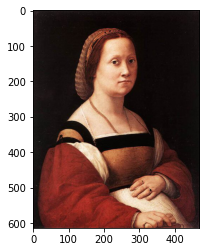

In [7]:
img=mpimg.imread(dataset_paths[53])
plt.imshow(img)

In [8]:
image = Image.open(dataset_paths[53])
image.show()

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [9]:
print(img.shape)
print(len(img.shape))

(614, 469, 3)
3


❓ **What was in the image above?**

In [10]:
img_shape = (614,469)
img_dim = 3

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [11]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [12]:
dataset_images = []
def create_dataset():
    for i in dataset_paths:
        img=mpimg.imread(i)
        dataset_images.append(img)
    return dataset_images

In [13]:
create_dataset()

[array([[[154, 156, 132],
         [159, 161, 137],
         [184, 186, 162],
         ...,
         [ 86, 102, 118],
         [ 51,  66,  85],
         [ 84, 101, 119]],
 
        [[150, 152, 128],
         [158, 160, 136],
         [187, 191, 166],
         ...,
         [ 65,  81,  96],
         [ 80,  96, 112],
         [ 61,  76,  95]],
 
        [[150, 154, 131],
         [119, 123, 100],
         [110, 114,  91],
         ...,
         [ 74,  87, 103],
         [ 91, 104, 120],
         [ 52,  65,  82]],
 
        ...,
 
        [[213, 189, 163],
         [250, 229, 200],
         [181, 164, 134],
         ...,
         [155, 138, 128],
         [150, 132, 128],
         [164, 146, 146]],
 
        [[200, 176, 152],
         [202, 181, 154],
         [195, 178, 150],
         ...,
         [166, 150, 137],
         [157, 139, 135],
         [166, 148, 148]],
 
        [[223, 199, 175],
         [227, 205, 181],
         [240, 223, 195],
         ...,
         [183, 167, 152],
  

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [14]:
type(dataset_images)

list

In [15]:
dataset_images = np.asarray(dataset_images,dtype='object')
dataset_images.shape

(1085,)

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [16]:
from tqdm import tqdm
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:01<00:00, 546.72it/s]


{3}

In [17]:
dataset_images.shape.as_list()

AttributeError: 'list' object has no attribute 'shape'

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [18]:
import tensorflow as tf
from tensorflow.image import resize

dataset_resized = []
def dataset_resized():
    for i in dataset_images :
        tf.image.resize(i, size=[120,100]).numpy()
        dataset_resized.append(i)
    return dataset_resized

In [19]:
dataset_resized()

AttributeError: 'function' object has no attribute 'append'

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [20]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(dataset_resized)
dataset_scaled = mm_scaler.transform(dataset_resized)

TypeError: float() argument must be a string or a number, not 'function'

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [21]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

NameError: name 'dataset_scaled' is not defined

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

In [22]:
plt.imshow(dataset_scaled[0])
plt.imshow(dataset_noisy[0])

NameError: name 'dataset_scaled' is not defined

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [ ]:
# YOUR CODE HERE

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  298M  100  298M    0     0  24.9M      0  0:00:11  0:00:11 --:--:-- 23.8M


### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [3]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [4]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY
from tensorflow import keras

encoder_inputs = keras.Input(shape=(120, 100, 3))
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Dense(8, activation="relu")(x)
x = layers.Flatten()(x)
encoder = keras.Model(encoder_inputs, x, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 50, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 25, 32)        18464     
_________________________________________________________________
dense (Dense)                (None, 30, 25, 8)         264       
_________________________________________________________________
flatten (Flatten)            (None, 6000)              0         
Total params: 20,520
Trainable params: 20,520
Non-trainable params: 0
_________________________________________________________________


👉 **Test your encoder below**

In [5]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Functional)         (None, 6000)              20520     
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 27,195
Trainable params: 27,195
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [6]:
from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(patience=30, restore_best_weights=True)

autoencoder.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mae'])

autoencoder.fit(X_train, Y_train,
          batch_size=16, # Too small --> no generalization. Too large --> compute slowly
          epochs=100,
          validation_split=0.3,
          callbacks=[es],
          verbose=0)

KeyboardInterrupt: 

❓ **Plot your training and validation loss at each epoch using the cell below**

In [ ]:
# Plot below your train/val loss history
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [585]:
# YOUR CODE HERE

In [591]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()